In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df = data.copy()

In [3]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [6]:
df.shape

(6167, 136)

In [7]:
df.isnull().values.any()

False

In [8]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_109', 'ind_420', 'ind_422']

In [9]:
for i in kat_deg:
    print(i,": ",df[i].value_counts().count())

# Kategorik verilerde kaç farklı kategori olduğuna baktım;

ind_109 :  2
ind_420 :  582
ind_422 :  573


In [10]:
dms = pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
df = df.drop(["ind_109", "50_target", "90_target"], axis = 1)

In [12]:
df = pd.concat([df, dms[["ind_109_GREEN"]]], axis = 1)

In [13]:
df["ind_420"] = df["ind_420"].replace("?", np.nan)
df["ind_422"] = df["ind_422"].replace("?", np.nan)

In [14]:
df = df.dropna(axis=0, subset=["ind_420","ind_422"])

In [15]:
df.isnull().sum().sum()

0

In [16]:
y = df["20_target"]

In [17]:
X = df.drop(["20_target"], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rf_model = RandomForestRegressor(random_state = 42)

In [21]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [22]:
rf_model.predict(X_test)[0:5]

array([ -4.3134703 , -12.45183511, -10.90160592,  12.60746861,
        12.22716022])

In [23]:
y_pred = rf_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

10.221710387994941

In [25]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [26]:
rf_model = RandomForestRegressor(random_state = 42)

In [27]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [28]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [29]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 1000}

In [30]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 15, 
                                 n_estimators =1000)

In [31]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
y_pred = rf_tuned.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

12.42236454970167

In [34]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

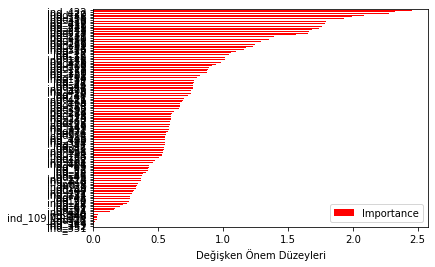

In [35]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")